## Import Packages

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn import set_config

In [2]:
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    LabelEncoder,
    OneHotEncoder,
    OrdinalEncoder
)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer, KNNImputer

In [3]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer

In [4]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)

In [5]:
from feature_engine.encoding import CountFrequencyEncoder
from feature_engine.outliers.winsorizer import Winsorizer

In [6]:
import mlflow

## Load the data

In [9]:
df = pd.read_csv("data/train.csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
columns_to_drop = ['PassengerId','Name','Ticket','Cabin']

In [13]:
def clean_data(df,columns_to_drop):
    
    return df.drop(columns=columns_to_drop).rename(columns=str.lower)
    

In [14]:
final_df = clean_data(df,columns_to_drop)
final_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [16]:
final_df['family'] = final_df['sibsp'] + final_df['parch']
final_df.drop(columns= ['sibsp','parch'],inplace=True)
final_df

,survived,pclass,sex,age,fare,embarked,family
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0
...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,0
887,1,1,female,19.0,30.0000,S,0
888,0,3,female,NaN,23.4500,S,3
889,1,1,male,26.0,30.0000,C,0


In [17]:
final_df.shape

(891, 7)

In [18]:
final_df.isna().sum()

survived      0
pclass        0
sex           0
age         177
fare          0
embarked      2
family        0
dtype: int64

In [23]:
final_df.loc[:,'embarked'].value_counts(normalize=True)*100

embarked
S    72.440945
C    18.897638
Q     8.661417
Name: proportion, dtype: float64

<Axes: ylabel='age'>

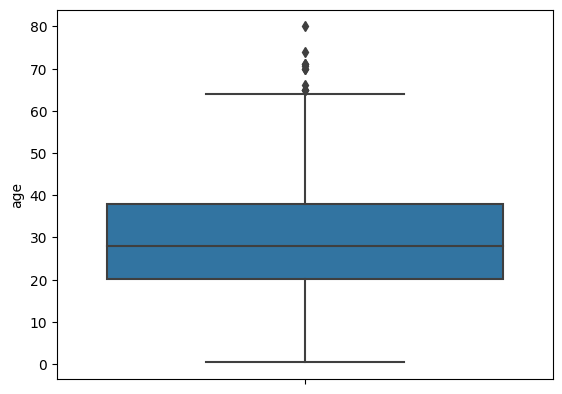

In [31]:
sns.boxplot(data = final_df, y='age')

<Axes: xlabel='sex', ylabel='count'>

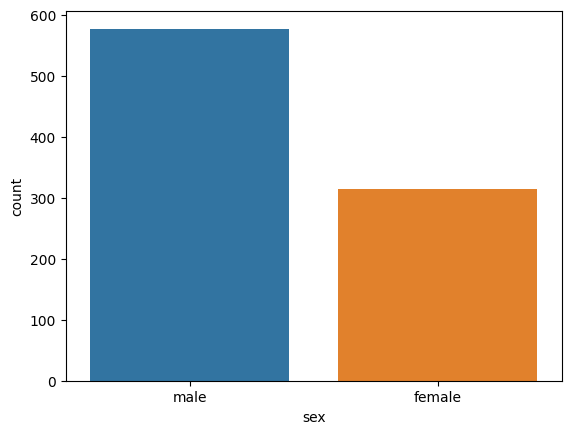

In [36]:
sns.countplot(data=final_df, x='sex')

<Axes: xlabel='embarked', ylabel='count'>

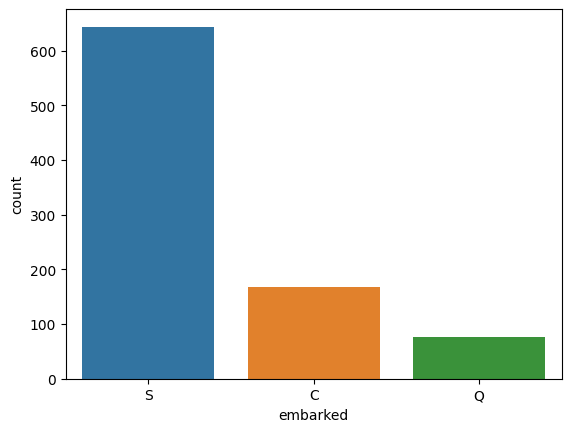

In [37]:
sns.countplot(data=final_df, x='embarked')

<Axes: xlabel='survived', ylabel='count'>

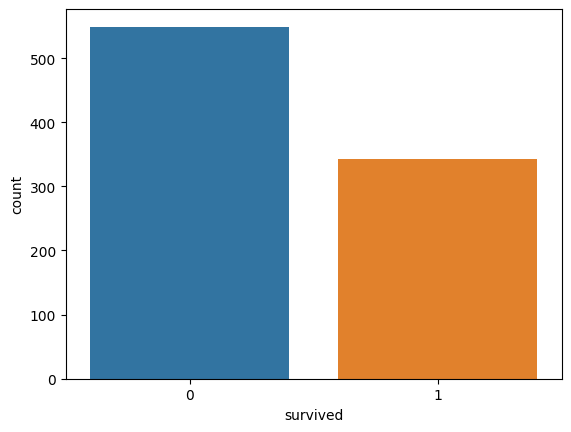

In [38]:
sns.countplot(data=final_df, x='survived')

In [39]:
X = final_df.drop(columns='survived')
y = final_df['survived']

In [41]:
X.shape, y.shape

((891, 6), (891,))

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [43]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 6), (179, 6), (712,), (179,))

## Pipeline for individual columns : for sequential steps

In [46]:
# age has missing values, outliers and needs to be scaled

# Winsorizer: caps maximum or minimum values using statistical parameters

# Gaussian limits:
#- right tail: mean + 3* std
#- left tail: mean - 3* std

age_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='Median')),
    ('outliers',Winsorizer(capping_method='gaussian',fold=3)),
    ('scale', StandardScaler())
])

In [47]:
age_pipe

Pipeline(steps=[('imputer', SimpleImputer(strategy='Median')),
                ('outliers', Winsorizer(fold=3)), ('scale', StandardScaler())])

### impute missing values